# Лабораторная работа 3

# Анимация движения секущей прямой к заданной линии на плоскости

Булгаков А.Е., 18.05.2025

In [138]:
from matplotlib.animation import FuncAnimation

In [140]:
#?FuncAnimation

• обязательный аргумент `fig` : графическое окно, в котором будет отображаться
анимация;

• обязательный аргумент `func` : функция одного обязательного аргумента, которая
будет вызываться в каждом кадре;

• НЕобязательный аргумент `frames` со стандартным значением `None` :
последовательность, элементы которой будут определять значение аргумента
функции `func` при последовательной индексации последовательности от начала
до конца;

• НЕобязательный аргумент `init_func` со стандартным значением `None` : функция,
которая вызывается перед началом анимации;

• НЕобязательный аргумент `repeat` со стандартным значением `True` : нужно ли
повторять анимацию снова после отрисовки всех кадров;

• НЕобязательный аргумент `interval` со стандартным значением `200` :
длительность задержки в миллисекундах между кадрами анимации.

*Обратите внимание*, что значениями аргументов `func` и `init_func` являются
функции. Также обратите внимание на использование `*` в качестве аргумента
функции `FuncAnimation` .



## Задание 3.1. Анимированное построение линии на плоскости

a) $\color{red}{Создайте}$ $\color{red}{анимацию}$ построения графика некоторой явно заданной аналитической функции $y=y(x)$ по значениям $x$, последовательно изменяющимся от $x_{min}$ до $x_{max}$ с
шагом $step$. Выполните задание для $y(x)=sin(x)^4$, $x_{min}=1$, $x_{max}=5$, $step=0.05$.

б)$\color{red}{Создайте}$ $\color{red}{анимацию}$ построения графика параметрически заданной функции $x=x(t)$, $y=y(t)$ по значениям $t$, последовательно изменяющимся от $t_{min}$ до $t_{max}$ с
шагом $step$. Выполните задание для функции из Задания 1.4 в Лб1, согласно Вашему варианту. Значения $t_{min}$ и $t_{max}$ выберите самостоятельно с учетом непрерывности параметрической функции на выбранном диапазоне, $step = (t_{max} - t_{min})/100$

### Реализация Задания 3.1a

In [146]:
import numpy as np

In [148]:
import matplotlib.pyplot as plt

Вызовем специальную команду JupyterLab, необходимую для корректного отображения анимации в интерактивном документе:

In [151]:
%matplotlib widget

Будем строить анимацию для функции вида $y(x)=sin(x)^4$ по значениям $x$, изменяющимся от $x_{min} = 1$ до $x_{max} = 5$ с
шагом $step = 0.05$

Определим функцию $y(x)$ с применением оператора `def`:

In [155]:
def y(x):
 return np.sin(x)**4

Создадим переменные

In [158]:
x_min = 1.; x_max = 5.; step = 0.05

Cоздадим массив `x_array` равномерно распределенных чисел на отрезке $[x_{min};x_{max}]$
 с шагом $step$ с помощью функции `arange` . Создадим массив
y_array соответствующих значений $y$ с помощью пользовательской функции `y`

In [161]:
x_array = np.arange(x_min, x_max, step)
y_array = y(x_array)

Из двух массивов `x_array` и `y_array` создадим матрицу `matrix` координат
точек графика функции $y(x)$. Матрица состоит из двух столбцов. Первый столбец
матрицы содержит x-координаты точек, второй столбец -- y-координаты точек:

In [164]:
matrix = np.transpose([x_array, y_array])

С помощью функции `figure` из модуля `pyplot` создадим графическое окно
`fig1` , в котором в дальнейшем будет отображаться анимация

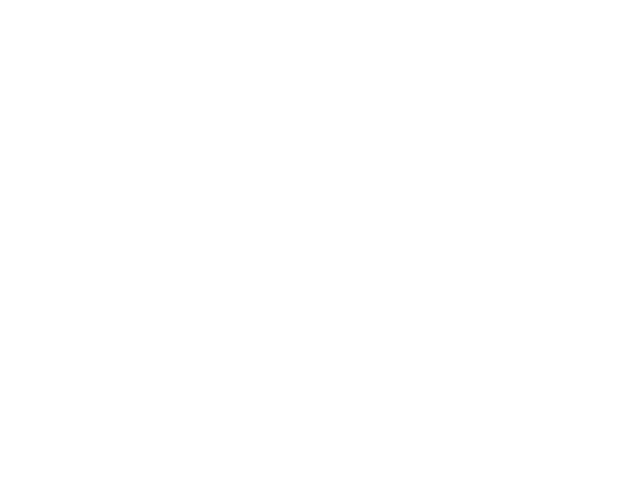

In [167]:
fig1 = plt.figure()

C помощью функции `axes` из модуля `pyplot` cоздадим графическую область
`ax1` и зададим для нее пределы по осям

In [170]:
y_min, y_max = np.min(y_array), np.max(y_array)
ax1 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])

(0.5, 5.5, -0.499999995004082, 1.4996930655910048)

С помощью функции `plot` из пакета `pyplot` создадим в графической области
`ax1` графический объект типа `Line2D` синего цвета, координаты которого пока не
определены

In [173]:
line1, = ax1.plot([],[],'b')
print(type(line1))
line1.get_xdata(), line1.get_ydata()

<class 'matplotlib.lines.Line2D'>


(array([], dtype=float64), array([], dtype=float64))

In [175]:
?line1.get_xdata

Signature: line1.get_xdata(orig=True)
Docstring:
Return the xdata.

If *orig* is *True*, return the original data, else the
processed data.
File:      d:\anaconda\lib\site-packages\matplotlib\lines.py
Type:      method

Определим пользовательскую функцию одного аргумента `at_frame1` , которая
будет вызываться в каждом кадре анимации.


Единственный аргумент функции `at_frame1` является массивом из x и y координат
точки графика функции. Функция `at_frame1` добавляет к графическому объекту
`line1` точку с координатами $(x;y)$

In [178]:
def at_frame1(point):
 """добавляет к объекту line1 точку с координатами (point[0],point[1])
 
 Arguments :
 
 point : массив из двух элементов
 
 Returns : None
 """
 x_coord = list(line1.get_xdata())
 y_coord = list(line1.get_ydata())
 
 x_coord.append(point[0])
 y_coord.append(point[1])
 
 line1.set_data(x_coord, y_coord)

In [180]:
?line1.set_data

Signature: line1.set_data(*args)
Docstring:
Set the x and y data.

Parameters
----------
*args : (2, N) array or two 1D arrays

See Also
--------
set_xdata
set_ydata
File:      d:\anaconda\lib\site-packages\matplotlib\lines.py
Type:      method

С помощью функции `help` и команды `?` извлекем строки документации для
пользовательской функции `at_frame1`

In [183]:
help(at_frame1)

Help on function at_frame1 in module __main__:

at_frame1(point)
    добавляет к объекту line1 точку с координатами (point[0],point[1])

    Arguments :

    point : массив из двух элементов

    Returns : None



In [185]:
?at_frame1

Signature: at_frame1(point)
Docstring:
добавляет к объекту line1 точку с координатами (point[0],point[1])

Arguments :

point : массив из двух элементов

Returns : None
File:      c:\users\pc\appdata\local\temp\ipykernel_2440\1406039668.py
Type:      function

Атрибут `__doc__ `объекта-функции содержит строки документации

In [188]:
print(at_frame1.__doc__)

добавляет к объекту line1 точку с координатами (point[0],point[1])
 
 Arguments :
 
 point : массив из двух элементов
 
 Returns : None
 


Для построения анимации полагаем аргумент `frames` для функции
`FuncAnimation` следующим образом: `frames=matrix` . Это означает, что
количество кадров анимации будет совпадать с количеством строк матрицы
`matrix` . При этом для каждого кадра анимации будет вызываться функция
`at_frame1` со значением аргумента, равным строке матрицы `matrix` , индекс
которой соответствует номеру кадра.

**$\color{red}{Важная}$ $\color{red}{информация}$ $\color{red}{для}$ $\color{red}{построения}$ $\color{red}{анимации}$**:вызов функций `figure` ,
`axes` , `plot` , необходимых для анимации, а также вызов функции `FuncAnimation`
должны располагаться в одной ячейке кода.

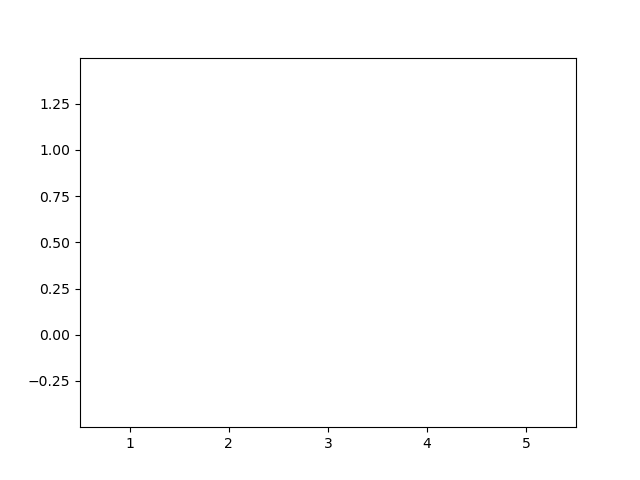

In [191]:
fig1 = plt.figure()
ax1 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])
line1, = ax1.plot([], [],'b')
FuncAnimation(fig1, at_frame1, frames=matrix, repeat=False, interval=15)

Для повторного воспроизведения анимации нужно запустить предыдующую ячейку
кода снова.

В результате многочисленных запусков анимации может накопиться много
объектов графических окон. Функция `close` удалит это объекты

In [194]:
plt.close('all')

### Реализация Задания 3.1b

$\color{red}{Создайте}$ $\color{red}{аналогичную}$ $\color{red}{анимацию}$ построения графика параметрически
заданной функции $x=x(t)$, $y=y(t)$ по значениям $t$, последовательно
изменяющимся от $t_{min}$ до $t_{max}$ с шагом $step$. Выполните задание для функции из
Задания 1.4 в Лб1, согласно Вашему варианту. Значения $t_{min}$ и $t_{max}$ выберите
самостоятельно с учетом непрерывности параметрической функции на выбранном
диапазоне, $step = (t_{max} - t_{min}) / 100 $


 $x = ln\sqrt{\frac{1-t}{1+t}} , y = \sqrt{1-t^2}$

In [199]:
def x(t):
    return np.log(np.sqrt((1 - t) / (1 + t)))

def y(t):
    return np.sqrt(1 - t**2)

In [201]:
t_min = -0.9
t_max = 0.9
step = (t_max - t_min) / 100
t_array = np.arange(t_min, t_max, step)
x_array1 = x(t_array)
y_array1 = y(t_array)

In [203]:
matrix1 = np.transpose([x_array1, y_array1])

(-1.884702847839837, 1.9722194895832204, -0.06411010564593272, 1.5)

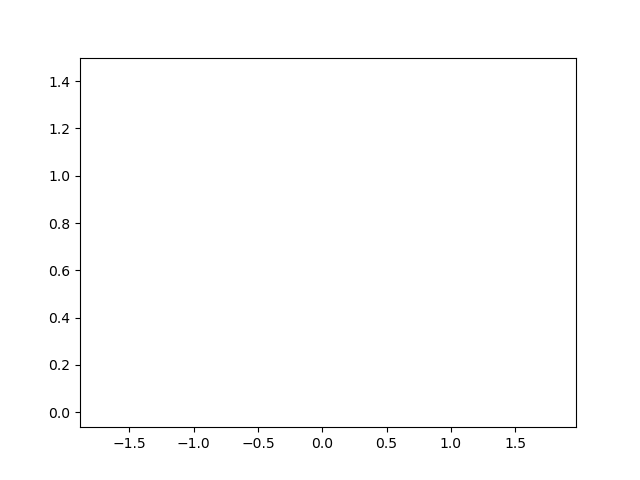

In [205]:
y_min1, y_max1 = np.min(y_array1), np.max(y_array1)
x_min1, x_max1 = np.min(x_array1), np.max(x_array1)
ax1 = plt.axes()
plt.axis([x_min1-0.5, x_max1+0.5, y_min1-0.5, y_max1+0.5])

In [207]:
line1, = ax1.plot([], [],'b')

In [209]:
def at_frame1(point):
 """добавляет к объекту line1 точку с координатами (point[0],point[1])
 
 Arguments :
 
 point : массив из двух элементов
 
 Returns : None
 """
 x_coord = list(line1.get_xdata())
 y_coord = list(line1.get_ydata())
 
 x_coord.append(point[0])
 y_coord.append(point[1])
 
 line1.set_data(x_coord, y_coord)

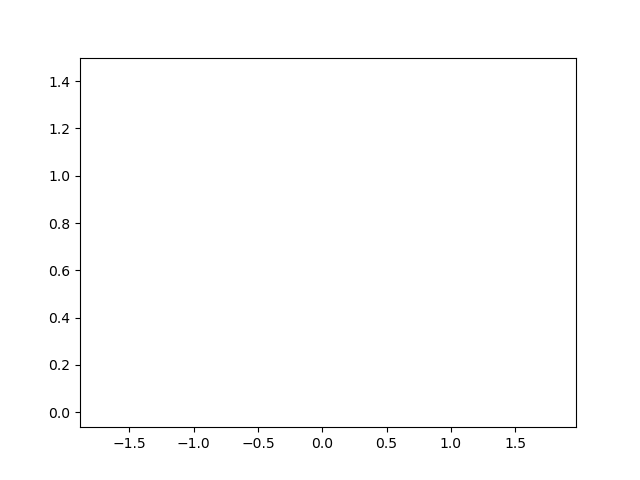

In [211]:
fig1 = plt.figure()
ax1 = plt.axes()
plt.axis([x_min1-0.5, x_max1+0.5, y_min1-0.5, y_max1+0.5])
line1, = ax1.plot([], [],'b')
FuncAnimation(fig1, at_frame1, frames=matrix1, repeat=False, interval=15)

In [213]:
plt.close('all')

## Задание 3.2. Движение точки по линии на плоскости

$\color{red}{Создайте}$ $\color{red}{анимацию}$  движения точки по графику функции $x=x(t)$, $y=y(t)$ по значениям $t$, последовательно
изменяющимся от $t_{min}$ до $t_{max}$ с шагом $step$. Функция $x=x(t)$, $y=y(t)$ и значения переменных $t_{min}$ ,$t_{max}$ , $step$ задаются
такими же, как и при выполнении Задания 3.1b

### Реализация Задания 3.2 для функции $y(x) = sin(x)^4$

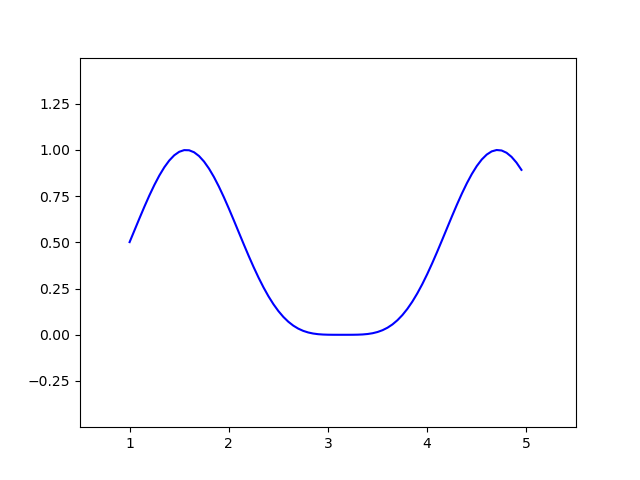

In [218]:
fig2 = plt.figure()
ax2 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])
line1, = ax2.plot(x_array, y_array,'b') # объект для графика функции
line2, = ax2.plot([], [],'go') # объект для точки

In [220]:
def at_frame2(point):
 """задает объект line2 точкой с координатами (point[0],point[1])

 Arguments :

 point : массив из двух элементов

 Returns : None
 """
 line2.set_data([point[0]],[point[1]])

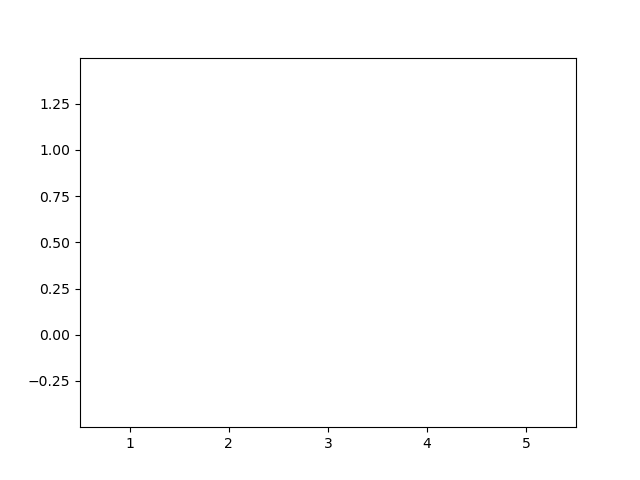

In [222]:
fig2 = plt.figure()
ax2 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])
def init():
    """создает начальное состояние графической области"""
    global line2 # переменная сделана глобальной, чтобы она могла изменяться внутри at_frame2
 
    line1, = ax2.plot(x_array, y_array,'b') 
    line2, = ax2.plot([], [],'go')
    plt.legend([r'$y(x) = \sin(x)^4$','Мovable point'])
FuncAnimation(fig2, at_frame2, frames=matrix, init_func=init, repeat=False, interval = 20)

In [224]:
plt.close('all')

$\color{red}{Создайте}$ аналогичную анимацию для функции  $x=x(t)$, $y=y(t)$ из Задания 3.1b

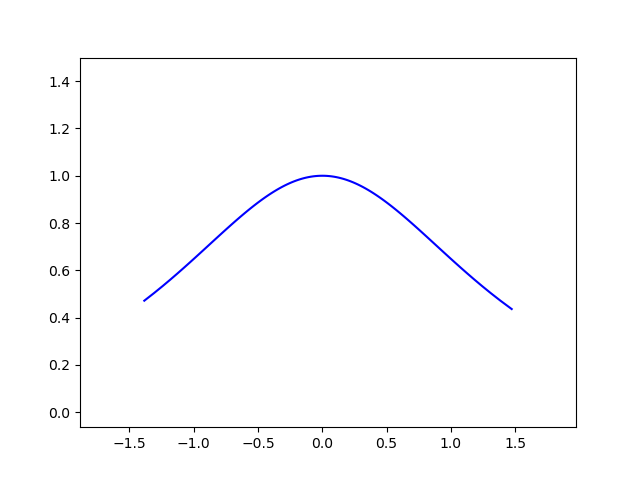

In [227]:
fig2 = plt.figure()
ax2 = plt.axes()
plt.axis([x_min1-0.5, x_max1+0.5, y_min1-0.5, y_max1+0.5])
line1, = ax2.plot(x_array1, y_array1,'b')
line2, = ax2.plot([], [],'go')

In [229]:
def at_frame2(point):
    line2.set_data([point[0]], [point[1]])

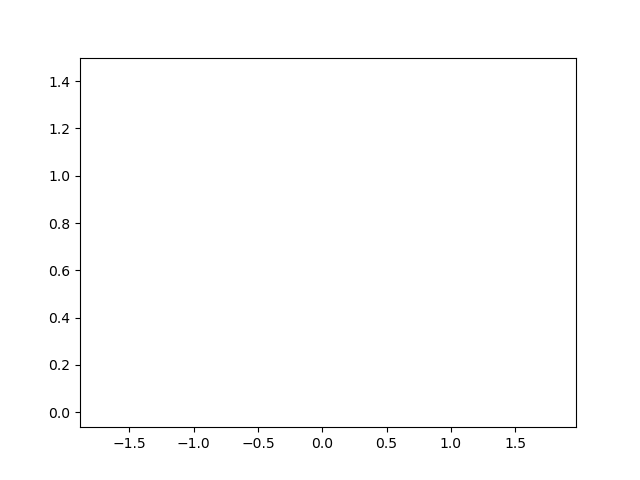

In [231]:
fig2 = plt.figure()
ax2 = plt.axes()
plt.axis([x_min1-0.5, x_max1+0.5, y_min1-0.5, y_max1+0.5])
def init():
    global line2
    line1, = ax2.plot(x_array1, y_array1,'b') 
    line2, = ax2.plot([], [],'go')
    plt.legend([r'$x = \ln\sqrt{\frac{1-t}{1+t}} , y = \sqrt{1-t^2}$','Мovable point'])
FuncAnimation(fig2, at_frame2, frames=matrix1, init_func=init, repeat=False, interval = 20)


In [233]:
plt.close('all')

## Задание 3.3. Движение секущей прямой к заданной линии на плоскости (версия 1)

Линия на плоскости задана графиком параметрической функции $x=x(t)$, $y=y(t)$ для $t \in [t_{min},t_{max}]$
из Задания 3.1b. Начальная точка $A$ с координатами $(x(t_{min}),y(t_{min}))$
является неподвижной точкой. Точка $B$ движется последовательно по линии от
конечной точки кривой с координатами $(x(t_{max}),y(t_{max}))$ к неподвижной точке $A$.

$\color{red}{Создайте}$ $\color{red}{анимацию}$ движения секущей прямой, проходящей через точки $A$ и $B$ до
момента совпадении координат точек $A$ и $B$, когда секущая прямая становится
касательной прямой к заданной линии в начальной точке $A$.

Перед началом анимации графическая область должна содержать следующие
графические объекты:

• график заданной функции, которая определяет траекторию движения подвижной
точки $B$;

• неподвижную точку $A$;

• начальное положение подвижной точки $B$;

• cекущую прямую, проходящую через точки $A$ и $B$.
Начальное состояние графической области реализуем с помощью пользовательской
функции init .

### Реализация Задания 3.3 для функции $y(x) = sin(x)^4$

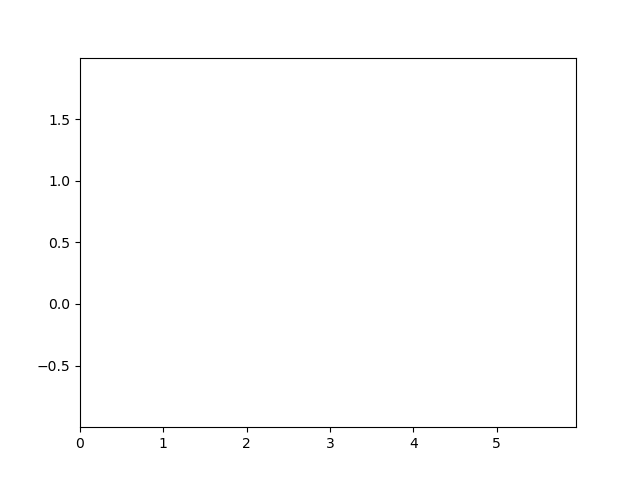

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sympy as sp

x_min = 1.; x_max = 5.; step = 0.05
x_array = np.arange(x_min, x_max, step)
y_array = np.sin(x_array)**4
y_min, y_max = np.min(y_array), np.max(y_array)
x_min, x_max = np.min(x_array), np.max(x_array)

x_sym = sp.symbols('x')
f_sym = sp.sin(x_sym)**4
f_prime_sym = sp.diff(f_sym, x_sym)

f_prime = sp.lambdify(x_sym, f_prime_sym, 'numpy')

# Создание фигуры и осей
fig3 = plt.figure()
ax3 = plt.axes()
plt.axis([x_min - 1, x_max + 1, y_min - 1, y_max + 1])

def init():
    """Создает начальное состояние графической области перед началом анимации."""
    global point_A, point_B, secant_line, tangent_line  # Глобальные переменные

    curve, = ax3.plot(x_array, y_array, 'b')  # График исходной функции

    A = np.array([x_array[0], y_array[0]])
    point_A, = ax3.plot(A[0], A[1], 'ro')

    B = np.array([x_array[-1], y_array[-1]])
    point_B, = ax3.plot(B[0], B[1], 'go')

    # Секущая линия
    secant_p = [A + (B - A) * t for t in [-2, 2]]
    secant_p = np.array(secant_p)
    secant_line, = ax3.plot(secant_p[:, 0], secant_p[:, 1], 'g')

    tangent_line, = ax3.plot([], [], 'r')

    plt.legend([r'$y(x) = \sin(x)^4$','Unmovable point A','Мovable point B','Seс'])
  
def at_frame3(point):
    """Обновляет положение точки B и линии (секущей или касательной) на каждом кадре."""
    global secant_line, tangent_line

    # Обновляем точки А и В
    point_B.set_data([point[0]], [point[1]])
    A = np.array([x_array[0], y_array[0]])

    # Если точки совпадают
    if np.allclose(A, point):
        k = f_prime(A[0])
        tangent_p = [A + np.array([1, k]) * t for t in [-100, 100]]  # Две точки касательной
        tangent_p = np.array(tangent_p)

        tangent_line.set_data(tangent_p[:, 0], tangent_p[:, 1])
        secant_line.set_data([], [])
    # Если точки не совпадают
    else:
        secant_p = [A + (point - A) * t for t in [-100, 100]]
        secant_p = np.array(secant_p)
        secant_line.set_data(secant_p[:, 0], secant_p[:, 1])
        tangent_line.set_data([], [])

FuncAnimation(fig3, at_frame3, frames=matrix[::-1], 
              init_func=init, repeat=False, interval=20)

In [241]:
plt.close('all')

### Реализация Задания 3.3 для функции $ x=x(t), y=y(t) $

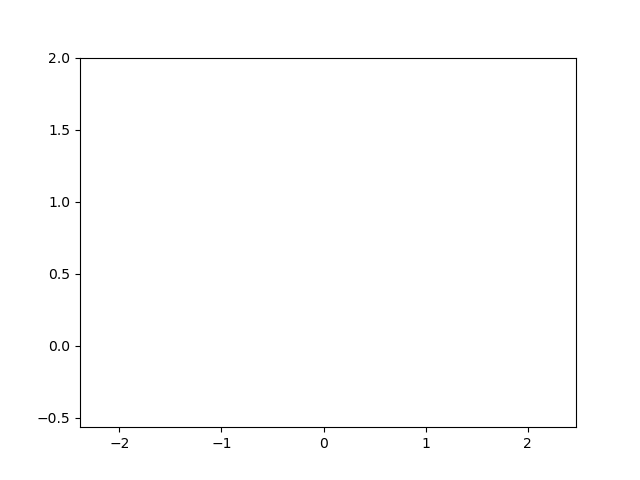

In [268]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sympy as sp

def x(t):
    return np.log(np.sqrt((1 - t) / (1 + t)))

def y(t):
    return np.sqrt(1 - t**2)

t_min = -0.9
t_max = 0.9
step = (t_max - t_min) / 100
t_array = np.arange(t_min, t_max, step)
x_array1 = x(t_array)
y_array1 = y(t_array)

matrix1 = np.transpose([x_array1, y_array1])

x_min1, x_max1 = np.min(x_array1), np.max(x_array1)
y_min1, y_max1 = np.min(y_array1), np.max(y_array1)

t = sp.symbols('t')
x_expr = sp.log(sp.sqrt((1-t)/(1+t)))
y_expr = sp.sqrt(1-t**2)

dx_dt = sp.diff(x_expr, t)
dy_dt = sp.diff(y_expr, t)
dy_dx = dy_dt / dx_dt

dy_dx_func = sp.lambdify(t, dy_dx, 'numpy')

fig3 = plt.figure()
ax3 = plt.axes()
plt.axis([x_min1-1, x_max1+1, y_min1-1, y_max1+1])

def init():
    """Создает начальное состояние графической области перед началом анимации."""
    global point_A, point_B, secant_line, tangent_line
    
    curve, = ax3.plot(x_array1, y_array1, 'b') # график исходной функции
    
    A = np.array([x_array1[0], y_array1[0]])
    point_A, = ax3.plot(A[0], A[1], 'ro') # неподвижная точка A
    
    B = np.array([x_array1[-1], y_array1[-1]])
    point_B, = ax3.plot(B[0], B[1], 'go') # подвижная точка B
    
    # Секущая линия через A и B
    secant_p = [A + (B - A)*t for t in [-2, 2]]
    secant_p = np.array(secant_p)
    secant_line, = ax3.plot(secant_p[:,0], secant_p[:,1], 'g')
    
    # Касательная линия (пока пустая)
    tangent_line, = ax3.plot([], [], 'r')
    
    plt.legend([r'$x = \ln\sqrt{\frac{1-t}{1+t}}, y = \sqrt{1-t^2}$',
               'Unmovable point A', 
               'Movable point B',
               'Secant line',
               'Tangent line'])

def at_frame3(point):
    """Обновляет положение точки B и линии (секущей или касательной) на каждом кадре."""
    global secant_line, tangent_line
    
    # Обновляем положение точки B
    point_B.set_data([point[0]], [point[1]])
    
    A = np.array([x_array1[0], y_array1[0]])
    
    # Проверяем, совпадают ли точки
    if np.allclose(A, point):
        k = dy_dx_func(t_array[0])
        tangent_p = [A + np.array([1, k]) * t for t in [-100, 100]]  # Две точки касательной
        tangent_p = np.array(tangent_p)

        tangent_line.set_data(tangent_p[:, 0], tangent_p[:, 1])
        secant_line.set_data([], [])
    # Если точки не совпадают
    else:
        secant_p = [A + (point - A) * t for t in [-100, 100]]
        secant_p = np.array(secant_p)
        secant_line.set_data(secant_p[:, 0], secant_p[:, 1])
        tangent_line.set_data([], [])

FuncAnimation(fig3, at_frame3, frames=matrix1[::-1], 
                   init_func=init, repeat=False, interval=20)

In [270]:
plt.close('all')

$\color{red}{Напишите}$ пользовательскую функцию `at_frame3(t)` , которая будет вызываться
в каждом кадре анимации, полагая, что аргумент `point` является массивом
координат подвижной точки. $\color{red}{Напишите}$ строки документации для
пользовательской функции `at_frame3` .

*Обратите внимание*, что при совпадении координат неподвижной точки $A$ и
подвижной точки $B$ уравнение для задания секущей прямой через две точки
возвращает только точку $A$. В этом случае векторно-параметрическое уравнение
прямой должно быть заменено на уравнение касательной прямой в точке $A$ .
Вычисление производной в точке $A$, необходимое для построения касательной
прямой, осуществите с помощью возможностей модуля `sympy` . Касательную
прямую изобразите красным цветом.


## Задание 3.4. Движение секущей прямой к заданной линии на плоскости (версия 2)

Линия на плоскости задана графиком параметрической функции $x=x(t)$, $y=y(t)$ для $t \in [t_{min},t_{max}]$
из Задания 3.1b. Точка $A$ с координатами $(x(t_{min}),y(t_{min}))$
является подвижной точкой на заданной линии, точка $B$ является неподвижной точкой с координатами $(x(t_{min}),y(t_{min}))$. Точка $A$  движется
последовательно по кривой до неподвижной точки $B$

$\color{red}{Создайте}$ $\color{red}{анимацию}$ движения секущей прямой, проходящей через точки $A$ и $B$
до момента совпадении координат точек $A$ и $B$, когда секущая прямая становится
касательной прямой к заданной линии в конечной точке $B$. Вычисление
производной в точке $B$, необходимое для построения касательной прямой,
осуществите с помощью возможностей модуля sympy . Касательную прямую
изобразите красным цветом

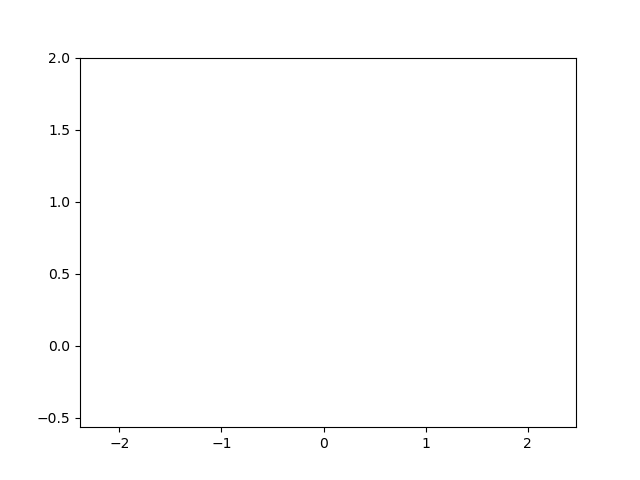

In [275]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sympy as sp

def x(t):
    return np.log(np.sqrt((1 - t) / (1 + t)))

def y(t):
    return np.sqrt(1 - t**2)

t_min = -0.9
t_max = 0.9
step = (t_max - t_min) / 100
t_array = np.arange(t_min, t_max, step)
x_array1 = x(t_array)
y_array1 = y(t_array)

matrix1 = np.transpose([x_array1, y_array1])

x_min1, x_max1 = np.min(x_array1), np.max(x_array1)
y_min1, y_max1 = np.min(y_array1), np.max(y_array1)

t = sp.symbols('t')
x_expr = sp.log(sp.sqrt((1-t)/(1+t)))
y_expr = sp.sqrt(1-t**2)

dx_dt = sp.diff(x_expr, t)
dy_dt = sp.diff(y_expr, t)
dy_dx = dy_dt / dx_dt

dy_dx_func = sp.lambdify(t, dy_dx, 'numpy')

fig3 = plt.figure()
ax3 = plt.axes()
plt.axis([x_min1-1, x_max1+1, y_min1-1, y_max1+1])

def init():
    """Создает начальное состояние графической области перед началом анимации."""
    global point_A, point_B, secant_line, tangent_line
    
    curve, = ax3.plot(x_array1, y_array1, 'b') # график исходной функции
    
    # Теперь B - неподвижная точка (последняя точка кривой)
    B = np.array([x_array1[-1], y_array1[-1]])
    point_B, = ax3.plot(B[0], B[1], 'go') 
    
    # A - подвижная точка (первая точка кривой)
    A = np.array([x_array1[0], y_array1[0]])
    point_A, = ax3.plot(A[0], A[1], 'ro') 
    
    # Секущая линия через A и B
    secant_p = [B + (A - B)*t for t in [-2, 2]]  # Обратное направление
    secant_p = np.array(secant_p)
    secant_line, = ax3.plot(secant_p[:,0], secant_p[:,1], 'g')
    
    # Касательная линия (пока пустая)
    tangent_line, = ax3.plot([], [], 'r')
    
    plt.legend([r'$x = \ln\sqrt{\frac{1-t}{1+t}}, y = \sqrt{1-t^2}$',
               'Unmovable point B',  
               'Movable point A',  
               'Secant line',
               'Tangent line'])

def at_frame3(point):
    """Обновляет положение точки A и линии (секущей или касательной) на каждом кадре."""
    global secant_line, tangent_line
    
    # Обновляем положение точки A (теперь она подвижная)
    point_A.set_data([point[0]], [point[1]])
    
    # B теперь неподвижная точка (последняя точка кривой)
    B = np.array([x_array1[-1], y_array1[-1]])
    
    # Проверяем, совпадают ли точки
    if np.allclose(B, point):
        k = dy_dx_func(t_array[-1])  # Производная в точке B
        tangent_p = [B + np.array([1, k]) * t for t in [-100, 100]]
        tangent_p = np.array(tangent_p)

        tangent_line.set_data(tangent_p[:, 0], tangent_p[:, 1])
        secant_line.set_data([], [])
    # Если точки не совпадают
    else:
        secant_p = [B + (point - B) * t for t in [-100, 100]]
        secant_p = np.array(secant_p)
        secant_line.set_data(secant_p[:, 0], secant_p[:, 1])
        tangent_line.set_data([], [])


FuncAnimation(fig3, at_frame3, frames=matrix1, 
                   init_func=init, repeat=False, interval=20)


In [277]:
plt.close('all')